In [1]:

#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import Libraries
from textblob import TextBlob

import sys
import matplotlib.pyplot as plt
import pandas as pd

import nltk
import pycountry
from nltk.stem import SnowballStemmer

from langdetect import detect

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer



In [2]:
df = pd.read_csv('restaurant.csv')

In [3]:
df.shape

(10417, 10)

In [4]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [5]:
df.stars.value_counts()

5    4247
4    2636
3    1561
1    1056
2     917
Name: stars, dtype: int64

In [6]:
plt.style.use('ggplot') 

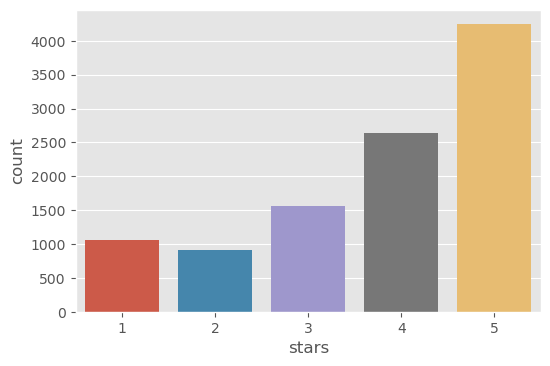

In [7]:
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(df.stars);

In [8]:
df.user_id.nunique() 
# how many unique-singular user ids have we found the game.

10129

In [9]:
df["year"] = pd.DatetimeIndex(df["date"]).year 
# We just took the year from the date column and put it in the newly opened df["year"] column.

In [10]:
df2=pd.DataFrame(df.groupby("year").stars.mean())
# We grouped the stars according to years and found their mean and made df.

<AxesSubplot:xlabel='year', ylabel='stars'>

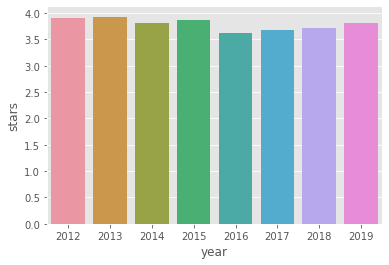

In [11]:
sns.barplot(df2.index,df2.stars)

In [12]:
df["month"] = pd.DatetimeIndex(df["date"]).month
# We just took the month from the date column and put it in the newly opened df["month"] column.

In [13]:
# We added Sentiment columns
df.loc[df['stars'] == 3, 'sentiment'] = 'neutral' 
df.loc[df['stars'] < 3, 'sentiment'] = 'negative' 
df.loc[df['stars'] > 3, 'sentiment'] = 'positive' 
df = df[["stars","sentiment","text"]]
df.head(5)

,stars,sentiment,text
0,5,positive,After getting food poisoning at the Palms hote...
1,4,positive,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,positive,The crab legs are better than the ones at Wick...
3,1,negative,Not worth it! Too salty food and expensive! Th...
4,5,positive,I would give this infinite stars if I could. M...


In [14]:
df.sentiment.value_counts(normalize=True)
# When normalize=True, it gives the sentiment values as a percentage.

positive    0.660747
negative    0.189402
neutral     0.149851
Name: sentiment, dtype: float64

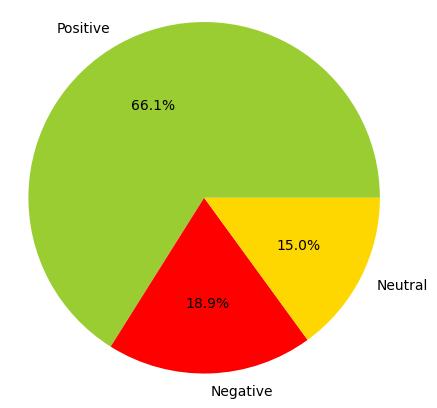

In [15]:
pie_sentiment = df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(5,5),dpi=100),
labels = 'Positive','Negative',"Neutral"
colors = ['yellowgreen', 'red','gold']
plt.pie(pie_sentiment,colors=colors,labels=labels,autopct='%1.1f%%')
plt.axis('equal');


In [16]:
# Text processing steps (remove numbers, punctuation, new line, lowercase capital letters)
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
new_line = lambda x: re.sub('\n',' ',x)

df['text'] = df.text.map(alphanumeric).map(punc_lower).map(new_line)
df.head()

,stars,sentiment,text
0,5,positive,after getting food poisoning at the palms hote...
1,4,positive,a feast worthy of gods baccarnal buffet in ...
2,4,positive,the crab legs are better than the ones at wick...
3,1,negative,not worth it too salty food and expensive th...
4,5,positive,i would give this infinite stars if i could m...


In [17]:
df['language'] = df['text'].apply(detect)

In [18]:
df = df[df["language"]=="en"]

In [19]:
df[['polarity', 'subjectivity']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [20]:
df[['polarity', 'subjectivity']]

,polarity,subjectivity
0,0.367452,0.605702
1,0.217299,0.532126
2,-0.134722,0.731944
3,-0.325000,0.400000
4,0.362500,0.725000
...,...,...
10412,0.543750,0.481250
10413,0.210101,0.586869
10414,0.480000,0.630000
10415,0.185185,0.533333


In [21]:
df

,stars,sentiment,text,language,polarity,subjectivity
0,5,positive,after getting food poisoning at the palms hote...,en,0.367452,0.605702
1,4,positive,a feast worthy of gods baccarnal buffet in ...,en,0.217299,0.532126
2,4,positive,the crab legs are better than the ones at wick...,en,-0.134722,0.731944
3,1,negative,not worth it too salty food and expensive th...,en,-0.325000,0.400000
4,5,positive,i would give this infinite stars if i could m...,en,0.362500,0.725000
...,...,...,...,...,...,...
10412,5,positive,best buffet ever irma was great served us be...,en,0.543750,0.481250
10413,4,positive,hollllllyyyy moleyyyy this buffet was one f...,en,0.210101,0.586869
10414,5,positive,the selection is amazing and all the food is e...,en,0.480000,0.630000
10415,4,positive,one of the best buffets i ve had in vegas my ...,en,0.185185,0.533333


In [22]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [23]:
text1=df[df["stars"]==1]

Word Cloud Saved Successfully


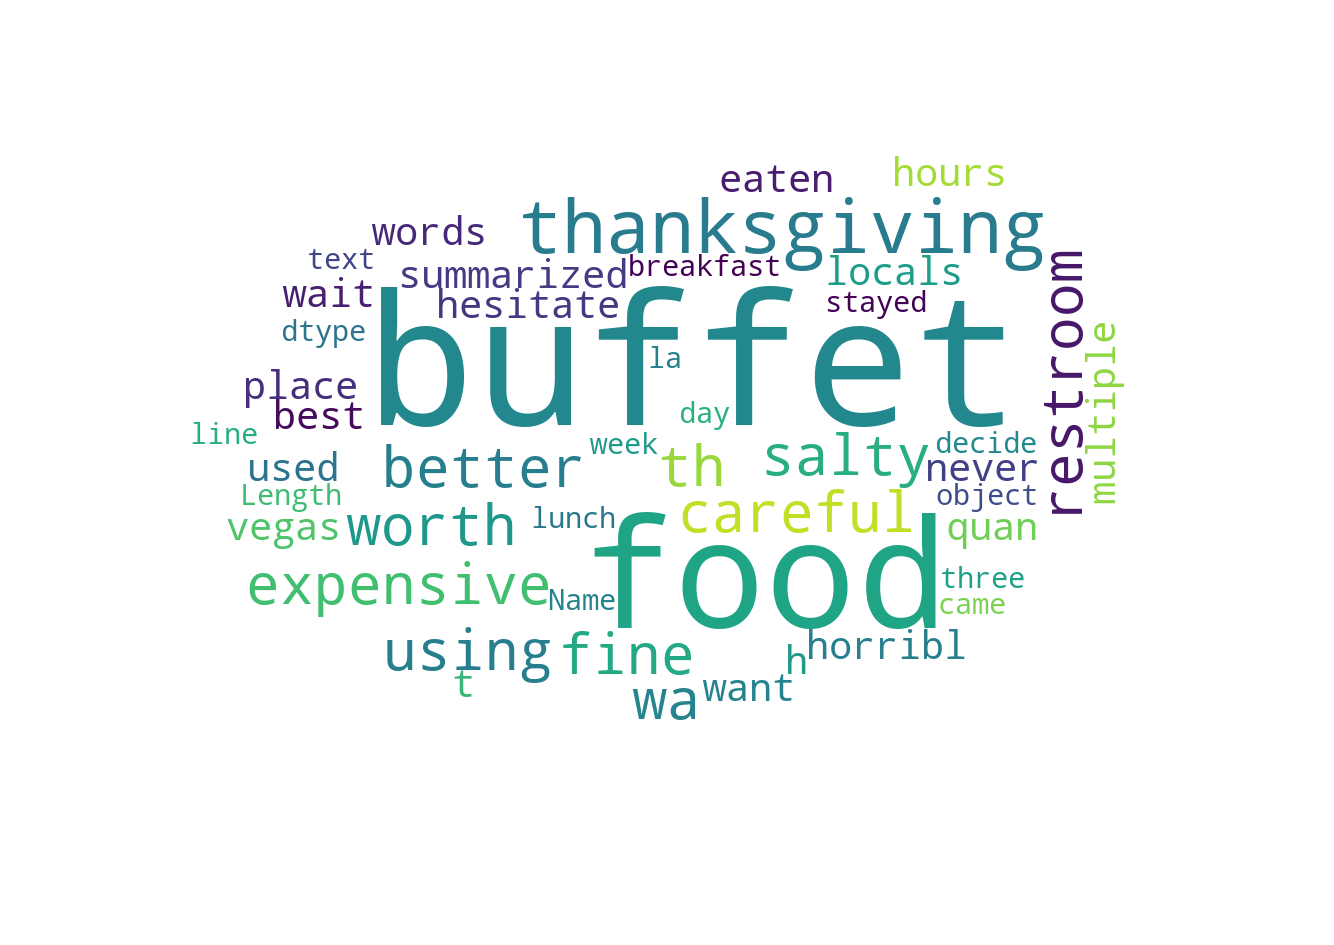

In [24]:
create_wordcloud(text1.text)

In [25]:
text5=df[df["stars"]==5]

Word Cloud Saved Successfully


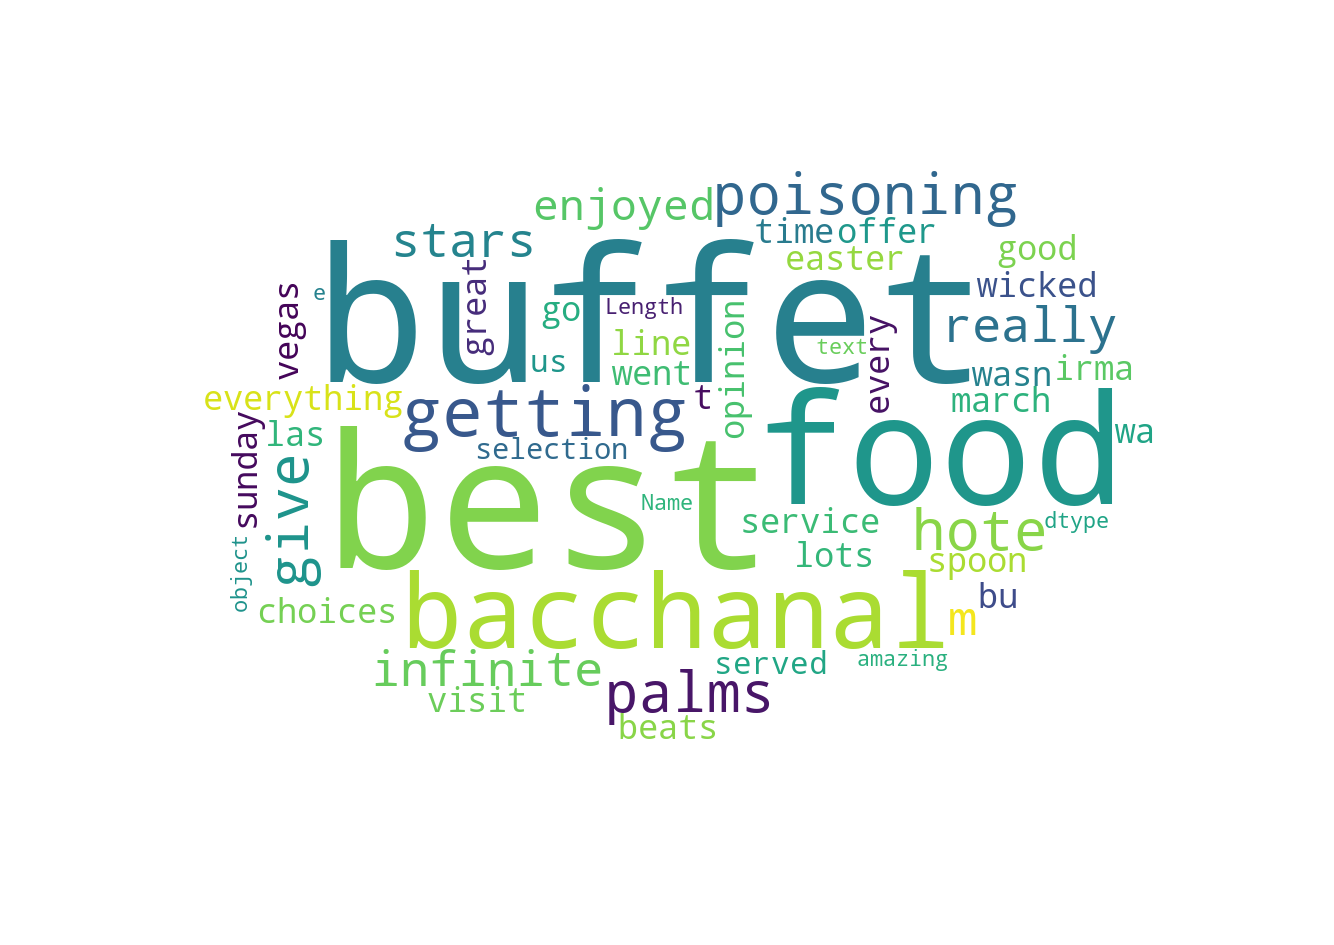

In [26]:
create_wordcloud(text5.text)

In [27]:
x = df.text
y = df.sentiment

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [29]:
vect = CountVectorizer()
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
print(x_train_dtm.shape)
print(x_test_dtm.shape)

(7261, 15378)
(3113, 15378)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1e9)
logreg.fit(x_train_dtm, y_train)
y_pred_class = logreg.predict(x_test_dtm)
print(metrics.accuracy_score(y_test, y_pred_class))

0.7947317699967876
